In [1]:
#Tues Dec 5 by Richen

In [2]:
#some visualization

#first part: n-grams
#second part: wordcloud

#!for better results:
#may need some other data processing for text (tokens/words/sentences/chars/punct)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
from collections import defaultdict
#from PIL import Image
#from os import path


In [4]:
df = pd.read_csv('train_paired_cleaned.csv')
df

,Unnamed: 0,more_toxic_text,less_toxic_text,toxicity_more_toxic,toxicity_less_toxic,labels_more_toxic,labels_less_toxic
0,0,To enjoy frustration and helplessness of Obama...,Well the issues of gender oppression forced la...,0.166667,0.100000,0,0
1,1,Trudeau Liberals national climate deal to have...,The stoners don t really care since they can g...,0.800000,0.200000,1,0
2,2,Actually Carl Hillary s crimes lies and sociop...,If you are doing business in a public forum an...,0.300000,0.166667,0,0
3,3,Liberals are stupid unskilled immigrants are s...,Most Catholics have no alternative to the Novu...,0.883333,0.200000,1,0
4,4,As usual Trump is right on Think about it this...,There s a couple of pretty big differences and...,0.200000,0.111111,0,0
...,...,...,...,...,...,...,...
99995,99995,Having recently returned from a few of the so ...,Bob Hawley and Connie S The apparently deleted...,0.166667,0.000000,0,0
99996,99996,So nothing concrete to protest they just do no...,And Obama appointed his basketball buddy We sa...,0.166667,0.166667,0,0
99997,99997,Stand behind your President guys that is how a...,To continue Walter you write In regard to tran...,0.500000,0.166667,0,0
99998,99998,I saw it on the news the night BEFORE his spee...,Of course he isn t Mariota but he s not Jonsen...,0.166667,0.166667,0,0


In [5]:
df['less_toxic_text'] = df['less_toxic_text'].apply(lambda x: ' '.join([w for w in str(x).lower().split()]))
df['more_toxic_text'] = df['less_toxic_text'].apply(lambda x: ' '.join([w for w in str(x).lower().split()]))
df

,Unnamed: 0,more_toxic_text,less_toxic_text,toxicity_more_toxic,toxicity_less_toxic,labels_more_toxic,labels_less_toxic
0,0,well the issues of gender oppression forced la...,well the issues of gender oppression forced la...,0.166667,0.100000,0,0
1,1,the stoners don t really care since they can g...,the stoners don t really care since they can g...,0.800000,0.200000,1,0
2,2,if you are doing business in a public forum an...,if you are doing business in a public forum an...,0.300000,0.166667,0,0
3,3,most catholics have no alternative to the novu...,most catholics have no alternative to the novu...,0.883333,0.200000,1,0
4,4,there s a couple of pretty big differences and...,there s a couple of pretty big differences and...,0.200000,0.111111,0,0
...,...,...,...,...,...,...,...
99995,99995,bob hawley and connie s the apparently deleted...,bob hawley and connie s the apparently deleted...,0.166667,0.000000,0,0
99996,99996,and obama appointed his basketball buddy we sa...,and obama appointed his basketball buddy we sa...,0.166667,0.166667,0,0
99997,99997,to continue walter you write in regard to tran...,to continue walter you write in regard to tran...,0.500000,0.166667,0,0
99998,99998,of course he isn t mariota but he s not jonsen...,of course he isn t mariota but he s not jonsen...,0.166667,0.166667,0,0


In [6]:
def ngram_generator(text, n=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS] 
    ngrams = zip(*[token[i:] for i in range(n)])
    return [' '.join(n_gram) for n_gram in ngrams]

In [7]:
N = 10

In [8]:
#less means less toxic
#more means more toxic

less_unigrams = defaultdict(int)
for row in df['less_toxic_text']:
    for word in ngram_generator(row, n=1):
        less_unigrams[word]+=1
        
df_less_unigrams = pd.DataFrame(sorted(less_unigrams.items(), key=lambda x:x[1])[::-1])
less_unigrams_words = df_less_unigrams[:N]

In [9]:
more_unigrams = defaultdict(int)
for row in df['more_toxic_text']:
    for word in ngram_generator(row, n=1):
        more_unigrams[word]+=1
        
df_more_unigrams = pd.DataFrame(sorted(more_unigrams.items(), key=lambda x:x[1])[::-1])
more_unigrams_words = df_more_unigrams[:N]

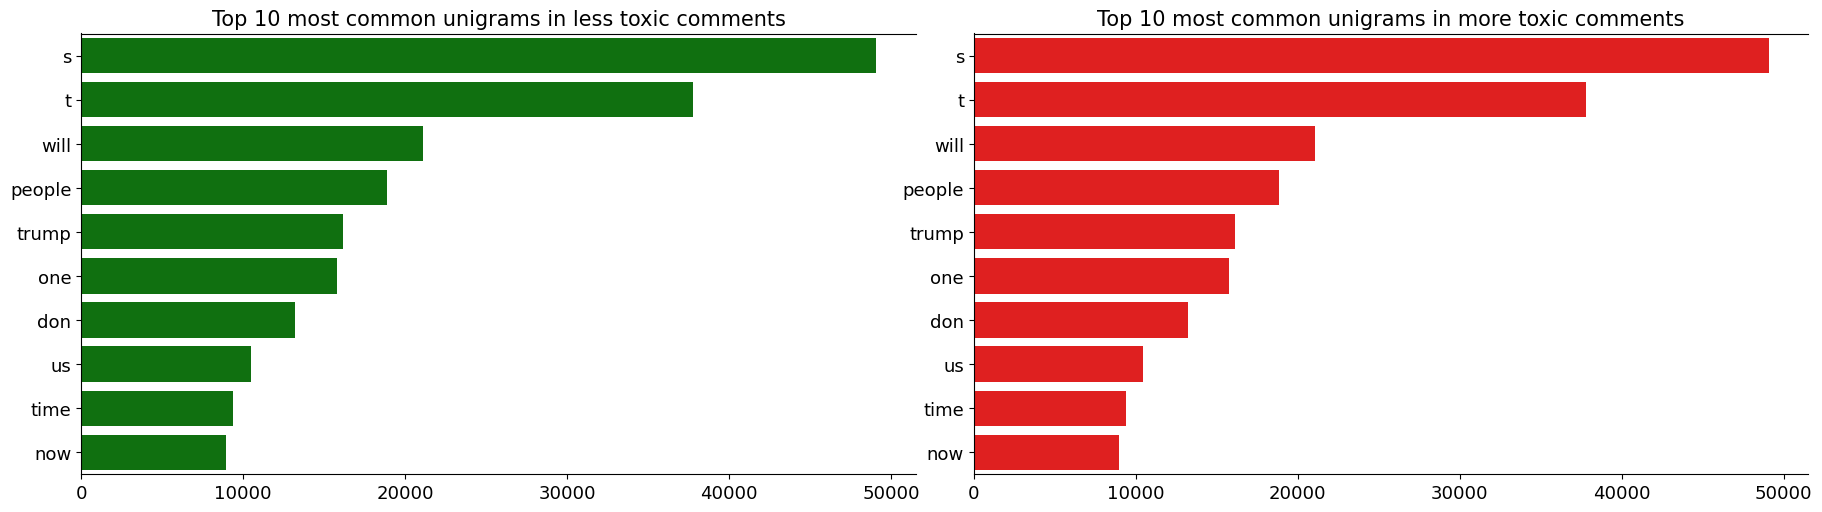

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(18, N//2), dpi=100)
plt.tight_layout()

sns.barplot(y=less_unigrams_words[0], x=less_unigrams_words[1], ax=axs[0], color='green')
sns.barplot(y=more_unigrams_words[0], x=more_unigrams_words[1], ax=axs[1], color='red')

for i in range(2):
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='x', labelsize=13)
    axs[i].tick_params(axis='y', labelsize=13)
    
axs[0].set_title(f'Top {N} most common unigrams in less toxic comments', fontsize=15)
axs[1].set_title(f'Top {N} most common unigrams in more toxic comments', fontsize=15)

plt.show()

In [11]:
less_bigrams = defaultdict(int)
for row in df['less_toxic_text']:
    for word in ngram_generator(row, n=2):
        less_bigrams[word]+=1
        
df_less_bigrams = pd.DataFrame(sorted(less_bigrams.items(), key=lambda x:x[1])[::-1])
less_bigrams_words = df_less_bigrams[:N]

In [12]:
more_bigrams = defaultdict(int)
for row in df['more_toxic_text']:
    for word in ngram_generator(row, n=2):
        more_bigrams[word]+=1
        
df_more_bigrams = pd.DataFrame(sorted(more_bigrams.items(), key=lambda x:x[1])[::-1])
more_bigrams_words = df_more_bigrams[:N]

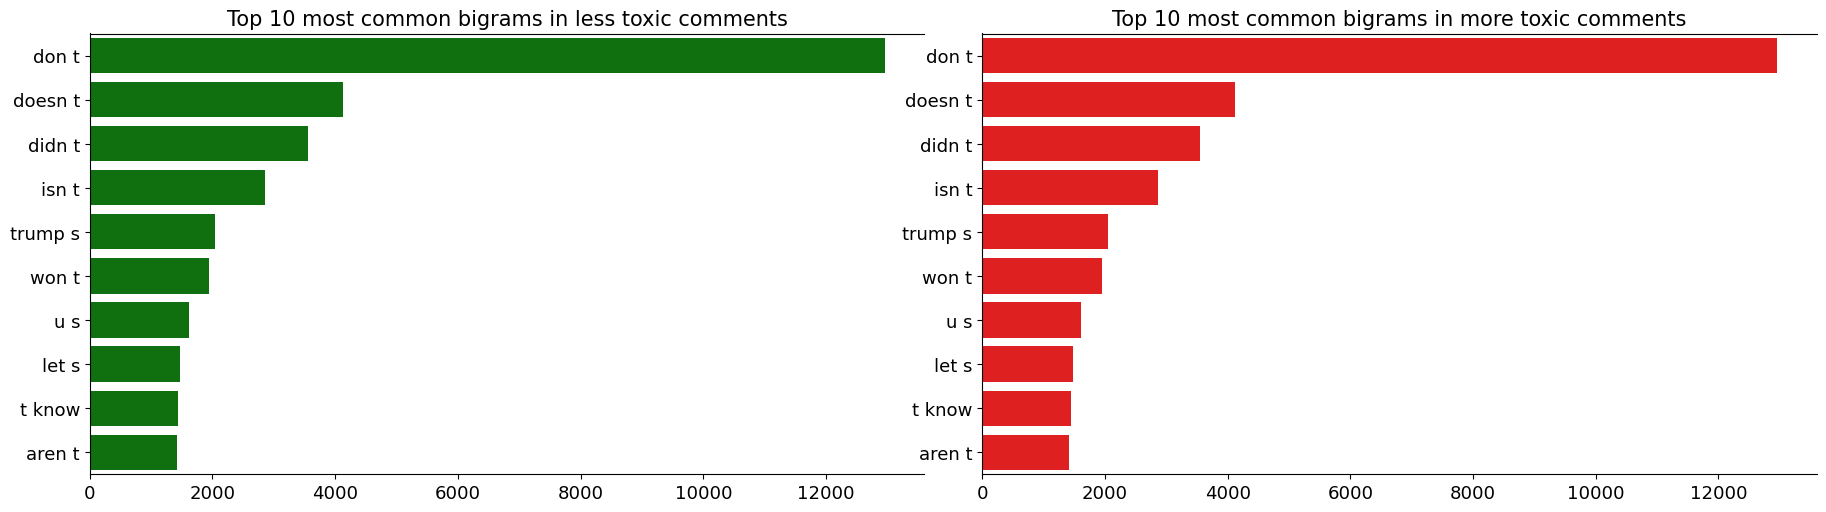

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(18, N//2), dpi=100)
plt.tight_layout()

sns.barplot(y=less_bigrams_words[0], x=less_bigrams_words[1], ax=axs[0], color='green')
sns.barplot(y=more_bigrams_words[0], x=more_bigrams_words[1], ax=axs[1], color='red')

for i in range(2):
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='x', labelsize=13)
    axs[i].tick_params(axis='y', labelsize=13)
    
axs[0].set_title(f'Top {N} most common bigrams in less toxic comments', fontsize=15)
axs[1].set_title(f'Top {N} most common bigrams in more toxic comments', fontsize=15)

plt.show()

In [14]:
less_trigrams = defaultdict(int)
for row in df['less_toxic_text']:
    for word in ngram_generator(row, n=3):
        less_trigrams[word]+=1
        
df_less_trigrams = pd.DataFrame(sorted(less_trigrams.items(), key=lambda x:x[1])[::-1])
less_trigrams_words = df_less_trigrams[:N]

In [15]:
more_trigrams = defaultdict(int)
for row in df['more_toxic_text']:
    for word in ngram_generator(row, n=3):
        more_trigrams[word]+=1
        
df_more_trigrams = pd.DataFrame(sorted(more_trigrams.items(), key=lambda x:x[1])[::-1])
more_trigrams_words = df_more_trigrams[:N]

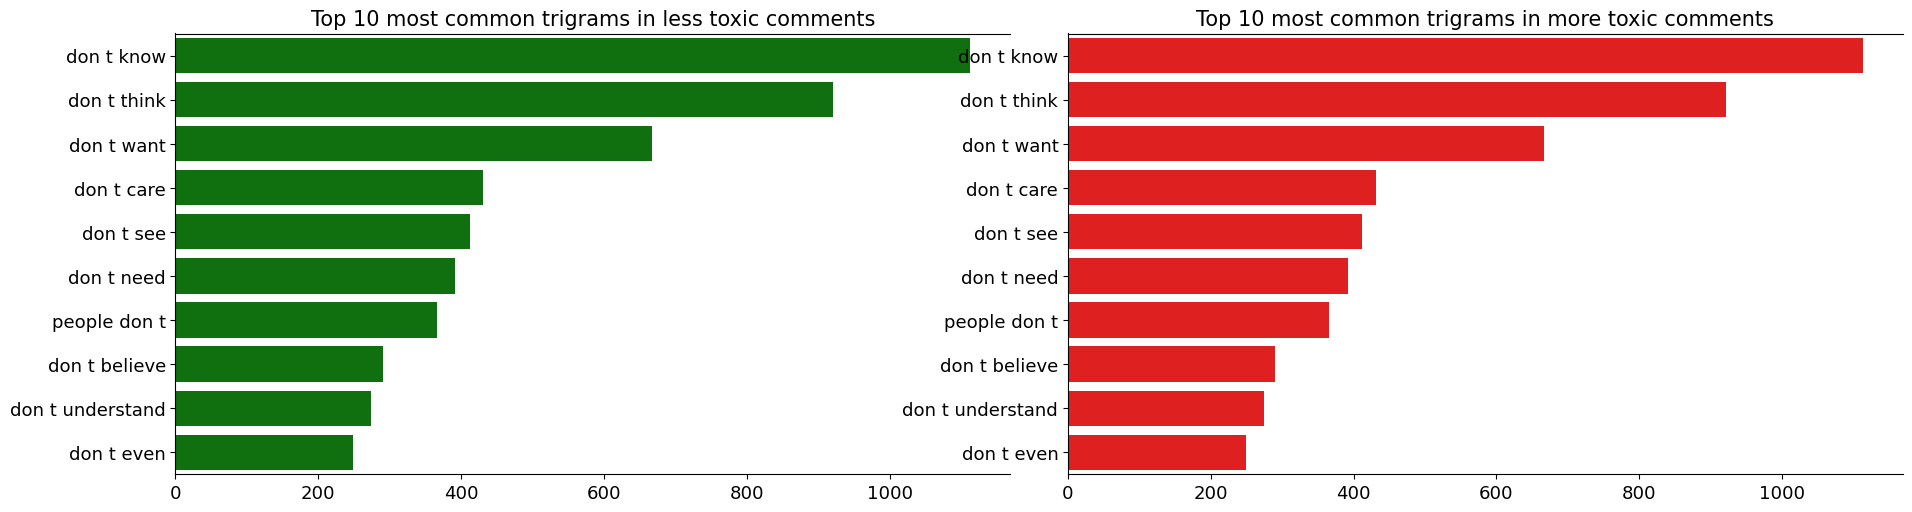

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(18, N//2), dpi=100)
plt.tight_layout()

sns.barplot(y=less_trigrams_words[0], x=less_trigrams_words[1], ax=axs[0], color='green')
sns.barplot(y=more_trigrams_words[0], x=more_trigrams_words[1], ax=axs[1], color='red')

for i in range(2):
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='x', labelsize=13)
    axs[i].tick_params(axis='y', labelsize=13)
    
axs[0].set_title(f'Top {N} most common trigrams in less toxic comments', fontsize=15)
axs[1].set_title(f'Top {N} most common trigrams in more toxic comments', fontsize=15)

plt.show()

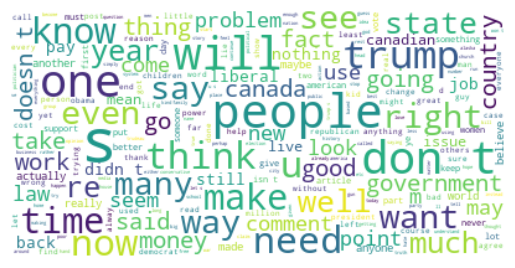

In [17]:
text = ' '.join(df['less_toxic_text'].values)
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color='white').generate(text.lower())

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

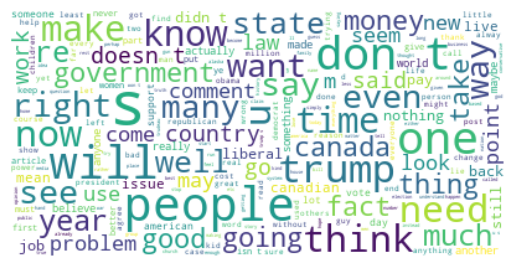

In [18]:
text = ' '.join(df['more_toxic_text'].values)
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color='white').generate(text.lower())

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
wordcloud.to_file('wordcloud_more_toxic.png')